# Bivariate EDA Analisis

### Key Business Questions:

1.  **Seasonal & Source Dynamics:** 
    How does production efficiency shift across seasons for each energy source? Specifically, does the inverse relationship between Solar (summer-peak) and Wind (often winter-peak) provide grid stability?

2.  **Long-Term Trends:** 
    Is there an observable year-over-year growth in total production capacity from 2020 to 2024? (Excluding the incomplete 2025 data to ensure fair comparison).

3.  **Monthly Consistency:** 
    Are production patterns consistent across the same month in different years, or do we observe significant anomalies driven by external factors (e.g., extreme weather events)?

## Open the cleaned data

In [1]:
import pandas as pd

csv_filename = "cleaned-wind-and-solar-energy.csv"
df = pd.read_csv(csv_filename, index_col=0)

In [2]:
df.head()

,Source,Month_Name,Season,Production,Year,Month
0,Wind,November,Fall,5281,2025,11
1,Wind,November,Fall,3824,2025,11
2,Wind,November,Fall,3824,2025,11
3,Wind,November,Fall,6120,2025,11
4,Wind,November,Fall,4387,2025,11


## 1. **Seasonal & Source Dynamics:** 

**Business Question**: 
- 1.1 How does production efficiency shift across seasons for each energy source?
- 1.2 Specifically, does the inverse relationship between Solar (summer-peak) and Wind (often winter-peak) provide grid stability?

In [3]:
# Data frequency and proportions by Season and Source
# How many observations belong to this Season–Source combination?
crosstab_source_season = pd.crosstab(df["Season"], df["Source"])
display(crosstab_source_season)

crosstab_source_season_percent = round(pd.crosstab(df["Season"], df["Source"], normalize="index") * 100, 2)
display(crosstab_source_season_percent)


Source,Solar,Wind
Season,,
Fall,1961,11149
Spring,2547,10694
Summer,4172,9075
Winter,698,11566


Source,Solar,Wind
Season,,
Fall,14.96,85.04
Spring,19.24,80.76
Summer,31.49,68.51
Winter,5.69,94.31


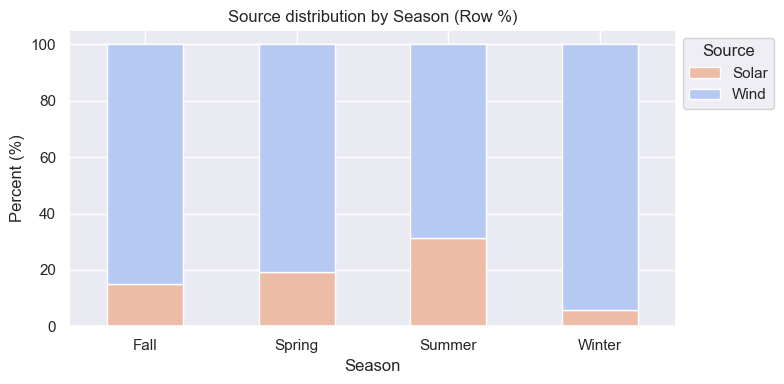

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
colors = ["#ecbca7", "#b6c9f3"]  # Solar, Wind

ax = crosstab_source_season_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(8,4),
    color=colors,
)

plt.title("Source distribution by Season (Row %)")
plt.xlabel("Season")
plt.ylabel("Percent (%)")
plt.legend(title="Source", bbox_to_anchor=(1.0, 1), loc="upper left")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()



In [5]:
from IPython.display import Markdown

report = f"""

### Initial exploration: Season vs. Source

By the percentage of incidence of energy source by season, we see a dominance of the Wind source datapoints for all seasons.
This pattern is even stronger in the Winter. On the other hand, in Summer, the datapoints of production from Solar sources increase.
Even though, this is not the production result, mearely the percentage of datapoints in our dataset, it can be supported by the fact that
more production data may be colected in the periods with more intense production. Is is worth mentionning that the dataset, before the cleaning,
did not have null or zero values, which may account for the difference in the percentage encountered.

In general, Solar records appear more frequently in summer, while wind records are more common in winter. This provides initial evidence of seasonal patterns in the dataset.
Solar contribution peaks in summer ~{round(crosstab_source_season_percent.Solar.Summer,2)} and drops sharply in winter ~{round(crosstab_source_season_percent.Solar.Winter, 2)}, with spring and fall showing intermediate levels. 
The same for Wind energy, which peaks in winter, ~{round(crosstab_source_season_percent.Wind.Winter,2)}, and drops in summer, ~{round(crosstab_source_season_percent.Wind.Summer,2)}.

"""
display(Markdown(report))




### Initial exploration: Season vs. Source

By the percentage of incidence of energy source by season, we see a dominance of the Wind source datapoints for all seasons.
This pattern is even stronger in the Winter. On the other hand, in Summer, the datapoints of production from Solar sources increase.
Even though, this is not the production result, mearely the percentage of datapoints in our dataset, it can be supported by the fact that
more production data may be colected in the periods with more intense production. Is is worth mentionning that the dataset, before the cleaning,
did not have null or zero values, which may account for the difference in the percentage encountered.

In general, Solar records appear more frequently in summer, while wind records are more common in winter. This provides initial evidence of seasonal patterns in the dataset.
Solar contribution peaks in summer ~31.49 and drops sharply in winter ~5.69, with spring and fall showing intermediate levels. 
The same for Wind energy, which peaks in winter, ~94.31, and drops in summer, ~68.51.



### 1.1 Production efficiency in relation to seasons and energy source

Text(0.5, 1.0, 'Average Production by Season and Source')

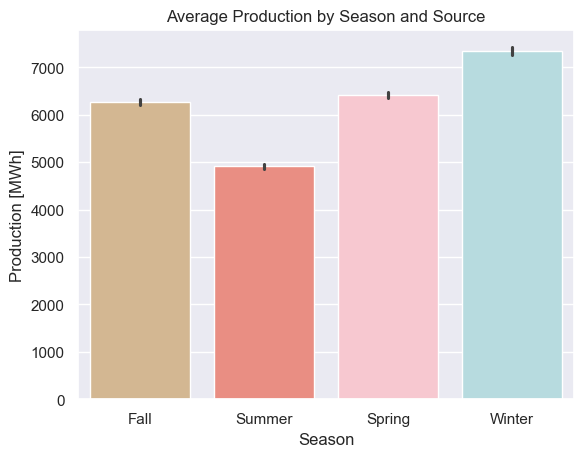

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colors based on the temperature of the month
seasons_palette = {"Fall": "burlywood", "Winter": "powderblue", "Summer": "salmon", "Spring": "pink"}
season_order = df.Season.unique()

sns.barplot(data = df,
            x = "Season",
            y = "Production",
            palette=seasons_palette,
            hue="Season",
            order=season_order)

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season and Source")

In [7]:
mean_prod_season = df[["Season","Production"]].groupby(["Season"]).mean()
mean_prod_season

,Production
Season,
Fall,6266.110908
Spring,6425.926969
Summer,4911.355779
Winter,7341.794684


Text(0.5, 1.0, 'Average Production by Season and Source')

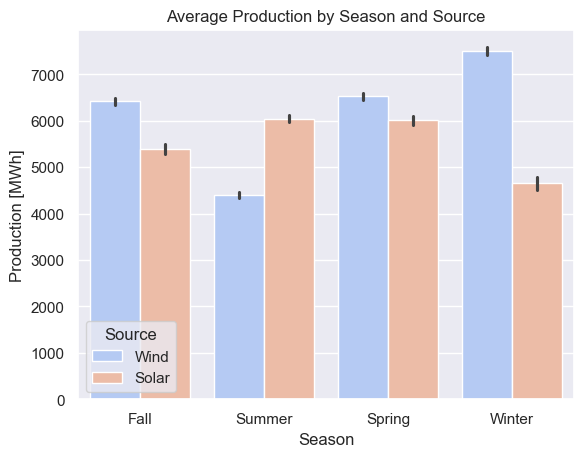

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

season_order = df.Season.unique()

sns.barplot(data = df,
            x = "Season",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            order=season_order)

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season and Source")

<Axes: xlabel='Source', ylabel='Production'>

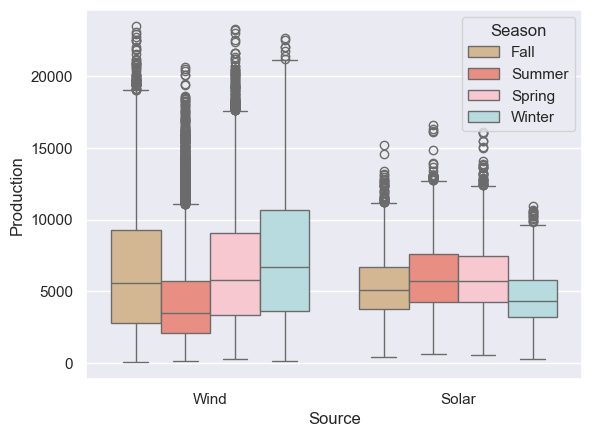

In [9]:
seasons_palette = {"Fall": "burlywood", "Winter": "powderblue", "Summer": "salmon", "Spring": "pink"}

sns.boxplot(df,
            y = "Production",
            x = "Source",
            palette=seasons_palette,
            hue = "Season",
            legend=True)

In [10]:
# statistical data
df[["Source", "Production", "Season"]].groupby(["Season", "Source"]).describe()

Production                                                   \
                   count         mean          std    min     25%     50%   
Season Source                                                               
Fall   Solar      1961.0  5386.830189  2327.507103  428.0  3762.0  5082.0   
       Wind      11149.0  6420.767782  4334.834702   58.0  2820.0  5581.0   
Spring Solar      2547.0  6009.738123  2440.833148  553.0  4238.0  5753.0   
       Wind      10694.0  6525.051057  3974.388910  274.0  3355.0  5767.5   
Summer Solar      4172.0  6044.805369  2418.667444  633.0  4259.5  5734.0   
       Wind       9075.0  4390.281212  3160.033830  140.0  2125.0  3484.0   
Winter Solar       698.0  4649.541547  1996.051987  267.0  3234.5  4370.0   
       Wind      11566.0  7504.270275  4599.198881  166.0  3653.0  6736.0   

                                  
                    75%      max  
Season Source                     
Fall   Solar    6730.00  15201.0  
       Wind     9299.00  23446.0  
Spring Solar    7495.50  16121.0  
       Wind     9054.00  23264.0  
Summer Solar    7623.00  16578.0  
       Wind     5706.50  20606.0  
Winter Solar    5816.25  10963.0  
       Wind    10647.00  22634.0

In [11]:
from IPython.display import Markdown

# TODO: Add boxplot insights...

report = f"""

### Insights: Average Production by Season and Source
From the average production we see the same pattern for the frequency of datapoints considering the season and source. Where we see the biggest gap between Wind and Solar in the mean production
in Summer and Winter. Confirming the pattern of increased solar energy production in summer, and decrease in wind, and vice versa.

"""
display(Markdown(report))




### Insights: Average Production by Season and Source
From the average production we see the same pattern for the frequency of datapoints considering the season and source. Where we see the biggest gap between Wind and Solar in the mean production
in Summer and Winter. Confirming the pattern of increased solar energy production in summer, and decrease in wind, and vice versa.



### 1.2 Grid Stability

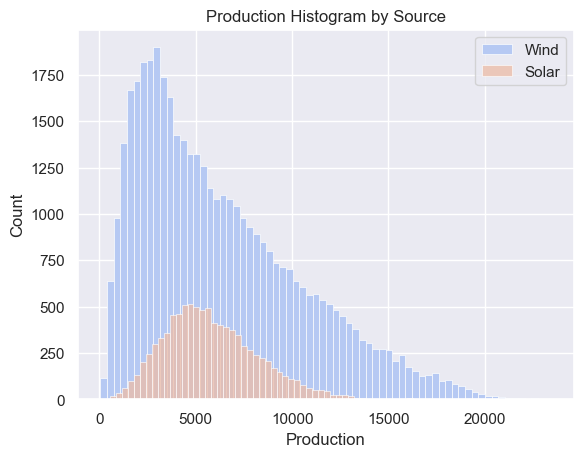

In [12]:
wind = df[df.Source == "Wind"]
solar = df[df.Source == "Solar"]

sns.histplot(data = wind, x = "Production", bins="auto", color="#b6c9f3", alpha=1, label = "Wind")
sns.histplot(data = solar, x = "Production", bins="auto", color="#ecbca7", label = "Solar")
colors = ["#ecbca7", "#b6c9f3"]  # Wind, Solar

plt.title("Production Histogram by Source")
plt.legend()
plt.show()



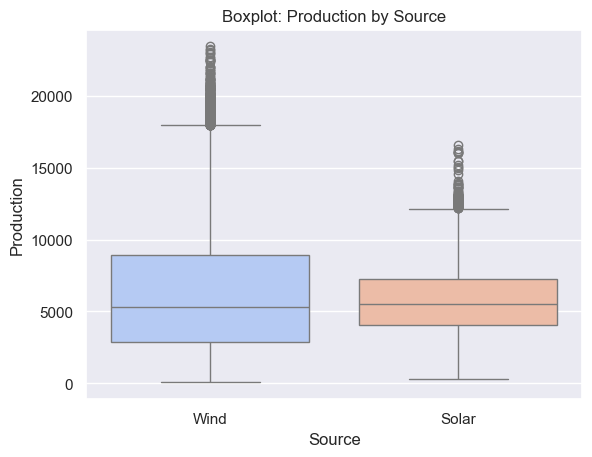

In [13]:
sns.boxplot(df,
            y = "Production",
            x = "Source",
            palette="coolwarm",
            hue = "Source",
            legend=False)

plt.title("Boxplot: Production by Source")
plt.show()


In [14]:
from IPython.display import Markdown

report = f"""

### Wind and Solar energy distribution 

The histogram plot for Wind and Solar energy show two different shapes, where solar looks like a gaussian distribution, while the wind energy have a big skew.
Insight: Our dataset is extremely unbalanced, probably due to having more wind energy power plants than solar. To compensate the drop in energy in colder months,
it would be beneficial to invest in solar power plants to provide better grid stability.

"""
display(Markdown(report))



### Wind and Solar energy distribution 

The histogram plot for Wind and Solar energy show two different shapes, where solar looks like a gaussian distribution, while the wind energy have a big skew.
Insight: Our dataset is extremely unbalanced, probably due to having more wind energy power plants than solar. To compensate the drop in energy in colder months,
it would be beneficial to invest in solar power plants to provide better grid stability.



## 2.  **Long-Term Trends:** 

Is there an observable year-over-year growth in total production capacity from 2020 to 2024? (Excluding the incomplete 2025 data to ensure fair comparison).

In [15]:
# Total Year Production by year and production source
df[["Year", "Source", "Production"]].groupby(["Year", "Source"]).agg(["sum", "mean", "median", "std"])

Production                                  
                   sum         mean  median          std
Year Source                                             
2020 Solar     4700080  3900.481328  3899.0  1296.497735
     Wind     42202441  5569.073766  4931.5  3425.617308
2021 Solar     6458219  4484.874306  4470.5  1643.173441
     Wind     39259471  5363.315710  4504.5  3591.438148
2022 Solar    10555892  5684.379106  5679.0  1963.833835
     Wind     39189831  5678.039844  4545.5  3929.231618
2023 Solar     9715845  6525.080591  6530.0  2220.664851
     Wind     53744024  7391.558795  6679.0  4682.096505
2024 Solar    10420592  6195.357907  6091.5  2446.135402
     Wind     48705535  6858.002675  5799.5  4747.794271
2025 Solar    12484057  7322.027566  7138.0  2682.526557
     Wind     44898926  7114.391697  6113.0  4480.914924

Text(0.5, 1.0, 'Total Production by Source from 2020-2025')

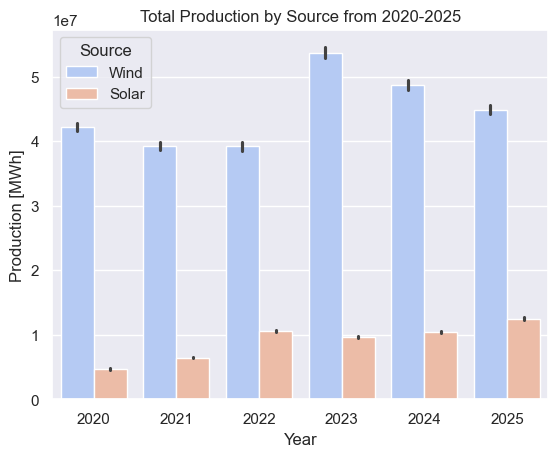

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            estimator='sum')

plt.ylabel("Production [MWh]")
plt.title ("Total Production by Source from 2020-2025")

# Wind dominates dataset, so its normal it might have higher total production

Text(0.5, 1.0, 'Total Production from 2020-2025')

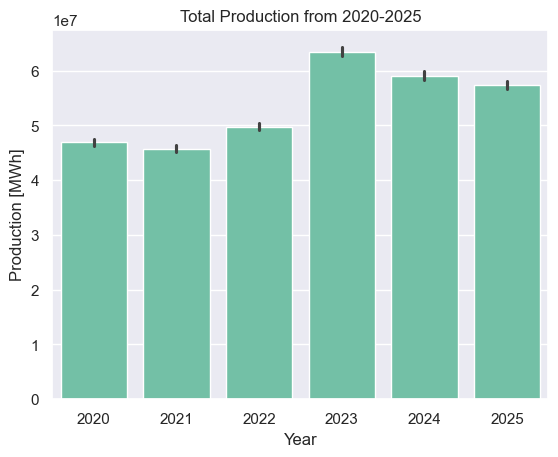

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            color="mediumaquamarine",
            estimator='sum')

plt.ylabel("Production [MWh]")
plt.title ("Total Production from 2020-2025")

# Wind dominates dataset, so its normal it might have higher total production

Text(0.5, 1.0, 'Mean Production by Source from 2020-2025')

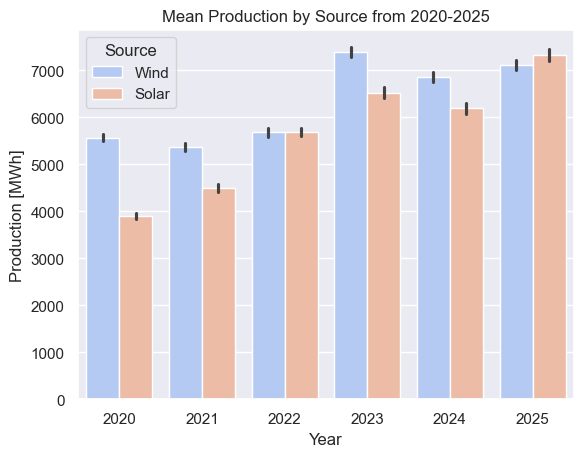

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            estimator='mean')

plt.ylabel("Production [MWh]")
plt.title ("Mean Production by Source from 2020-2025")

# By mean production they are less different

Text(0.5, 1.0, 'Average Production by Season from 2020-2025')

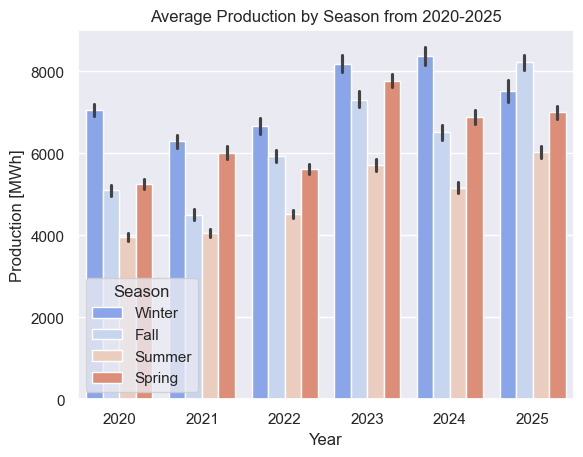

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# TODO:  chang colors to seasons_palette = {"Fall": "burlywood", "Winter": "powderblue", "Summer": "salmon", "Spring": "pink"}

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Season",
            palette="coolwarm")

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season from 2020-2025")